In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

### CO2 Flux against DIC - Baseline

In [5]:
dic_baseline = xr.open_dataset('/Volumes/UnionSine 1/Data_Transfer/2.6/DIC_baseline_ensemble1_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 100))

In [ ]:
co2flux_baseline = xr.open_dataset('/Volumes/UnionSine 1/Data_Transfer/2.6/CO2flux_baseline_ensemble1_ssp126_1m.nc')

In [8]:
sliced_dic_baseline = dic_baseline.where((-25 < dic_baseline.nav_lon) & (dic_baseline.nav_lon < 10) & (40 < dic_baseline.nav_lat) & (dic_baseline.nav_lat < 70), drop=True)

In [9]:
sliced_co2flux_baseline = co2flux_baseline.where((-25 < co2flux_baseline.nav_lon) & (co2flux_baseline.nav_lon < 10) & (40 < co2flux_baseline.nav_lat) & (co2flux_baseline.nav_lat < 70), drop=True)

In [10]:
start_date = "2080-01-01"
end_date = "2100-01-01"

co2flux_frame_baseline = sliced_co2flux_baseline.sel(time_counter=slice(start_date, end_date))
co2flux_frame_baseline = co2flux_frame_baseline.co2flux_cpl.mean(dim=('y', 'x'))

In [11]:
start_date = "2080-01-01"
end_date = "2100-01-01"

dic_frame_baseline = sliced_dic_baseline.sel(time_counter=slice(start_date, end_date))
dic_frame_baseline = dic_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))

In [12]:
co2flux_frame_baseline = co2flux_frame_baseline.to_dataframe('co2flux_cpl')
dic_frame_baseline = dic_frame_baseline.to_dataframe('DIC')

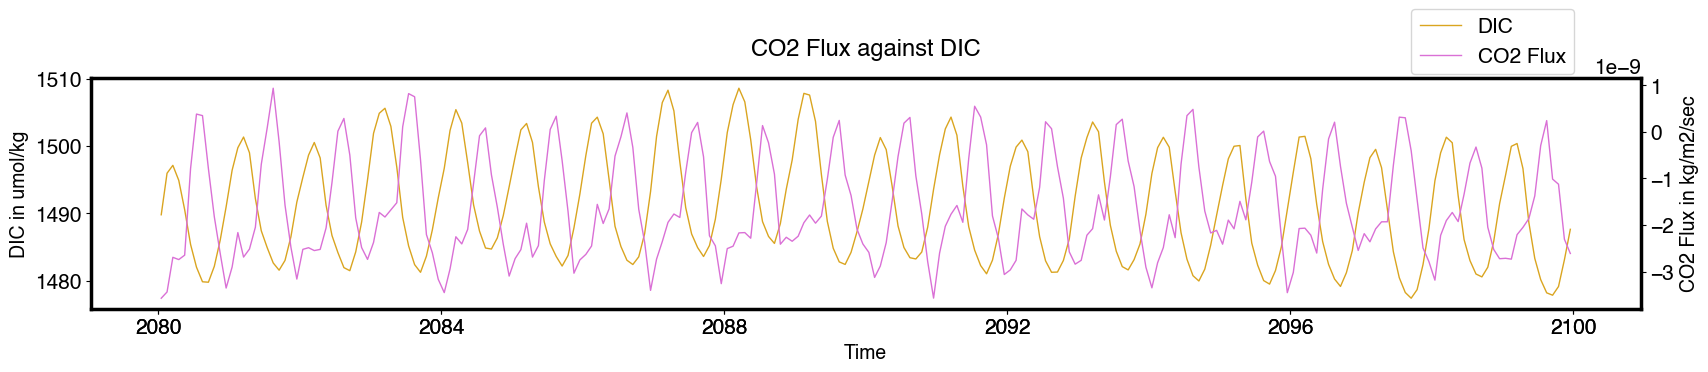

In [13]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(dic_frame_baseline.index, dic_frame_baseline.DIC, linewidth=1, color="goldenrod", label = 'DIC')
ax.set_ylabel('DIC in umol/kg', fontsize=14)

ax2.plot(co2flux_frame_baseline.index, co2flux_frame_baseline.co2flux_cpl, linewidth=1, color="orchid", label = 'CO2 Flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 Flux against DIC', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()

### CO2 Flux against DIC - OAE

In [16]:
dic_oae = xr.open_dataset('/Volumes/UnionSine 1/Data_Transfer/2.6/DIC_CDR_EU_coast_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [17]:
co2flux_oae = xr.open_dataset('/Volumes/UnionSine 1/Data_Transfer/2.6/CO2flux_CDR_EU_coast_ssp126_1m.nc')

In [18]:
sliced_dic_oae = dic_oae.where((-25 < dic_oae.nav_lon) & (dic_oae.nav_lon < 10) & (35 < dic_oae.nav_lat) & (dic_oae.nav_lat < 70), drop=True)

In [19]:
sliced_co2flux_oae = co2flux_oae.where((-25 < co2flux_oae.nav_lon) & (co2flux_oae.nav_lon < 10) & (40 < co2flux_oae.nav_lat) & (co2flux_oae.nav_lat < 70), drop=True)

In [20]:
start_date = "2080-01-01"
end_date = "2100-01-01"

co2flux_frame_oae = sliced_co2flux_oae.sel(time_counter=slice(start_date, end_date))
co2flux_frame_oae = co2flux_frame_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [21]:
start_date = "2080-01-01"
end_date = "2100-01-01"

dic_frame_oae = sliced_dic_oae.sel(time_counter=slice(start_date, end_date))
dic_frame_oae = dic_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [22]:
co2flux_frame_oae = co2flux_frame_oae.to_dataframe('co2flux_cpl')
dic_frame_oae = dic_frame_oae.to_dataframe('DIC')

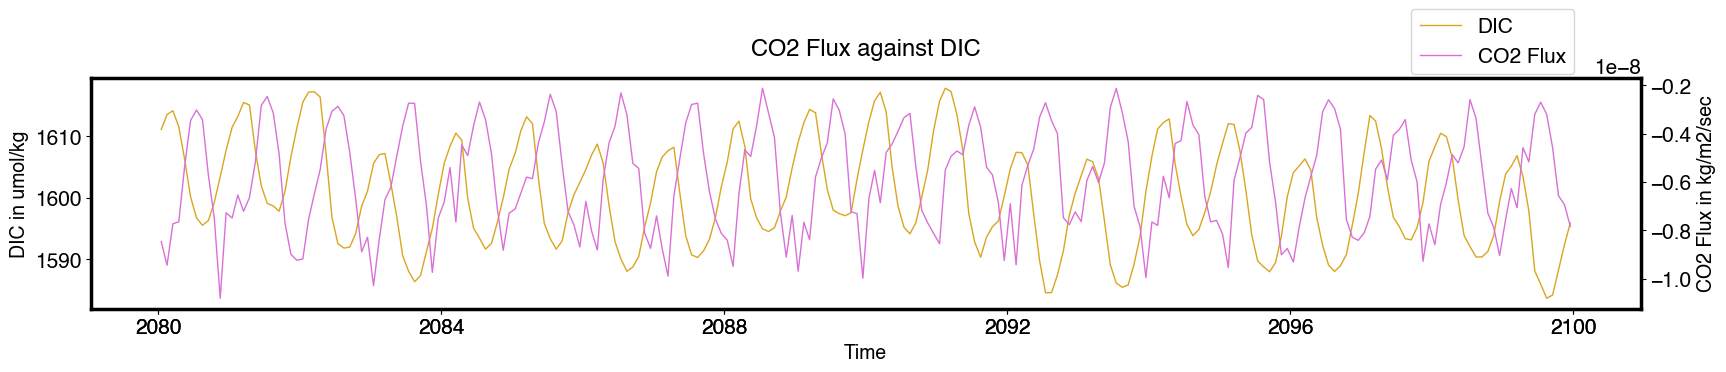

In [23]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(dic_frame_oae.index, dic_frame_oae.DIC, linewidth=1, color="goldenrod", label = 'DIC')
ax.set_ylabel('DIC in umol/kg', fontsize=14)

ax2.plot(co2flux_frame_oae.index, co2flux_frame_oae.co2flux_cpl, linewidth=1, color="orchid", label = 'CO2 Flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 Flux against DIC', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()

### CO2 Flux against FCO2 - Baseline

In [24]:
fco2_baseline = xr.open_mfdataset('/Volumes/UnionSine 1/FCO2/FCO2_Baseline/*.nc')

In [25]:
sliced_fco2_baseline = fco2_baseline.where((-25 < fco2_baseline.nav_lon) & (fco2_baseline.nav_lon < 10) & (40 < fco2_baseline.nav_lat) & (fco2_baseline.nav_lat < 70), drop=True)

In [26]:
start_date = "2080-01-01"
end_date = "2100-01-01"

fco2_frame_baseline = sliced_fco2_baseline.sel(time_counter=slice(start_date, end_date))
fco2_frame_baseline = fco2_frame_baseline.fco2.mean(dim=('y', 'x'))

In [27]:
fco2_frame_baseline = fco2_frame_baseline.to_dataframe('fco2')

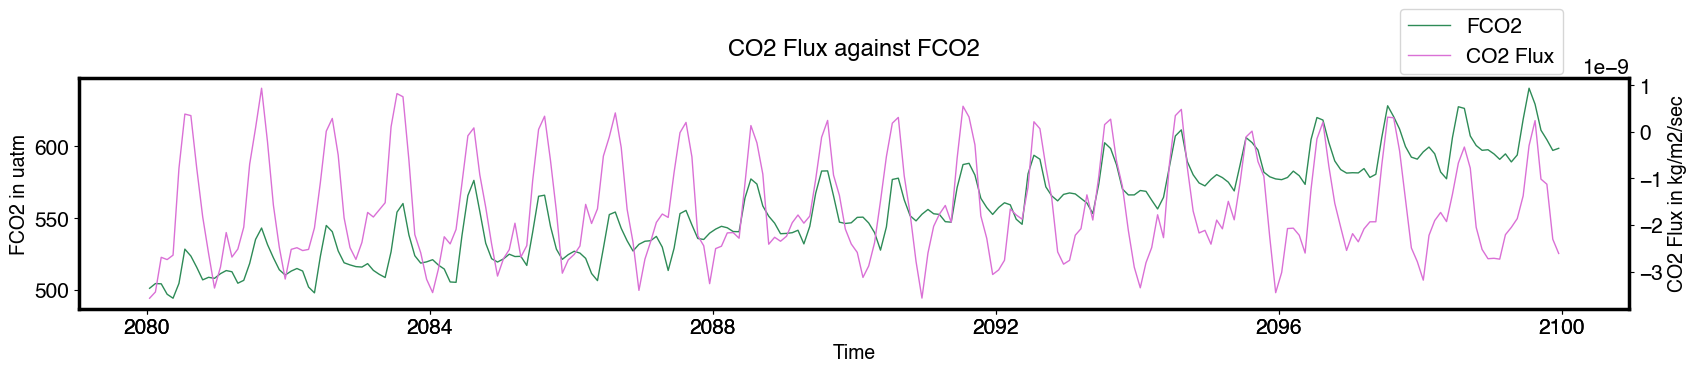

In [32]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(fco2_frame_baseline.index, fco2_frame_baseline.fco2, linewidth=1, color="seagreen", label = 'FCO2')
ax.set_ylabel('FCO2 in uatm', fontsize=14)

ax2.plot(co2flux_frame_baseline.index, co2flux_frame_baseline.co2flux_cpl, linewidth=1, color="orchid", label = 'CO2 Flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 Flux against FCO2', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()

### CO2 Flux against FCO2 - OAE

In [33]:
fco2_oae = xr.open_mfdataset('/Volumes/UnionSine 1/FCO2/FCO2_OAE/*.nc')

In [34]:
sliced_fco2_oae = fco2_oae.where((-25 < fco2_oae.nav_lon) & (fco2_oae.nav_lon < 10) & (40 < fco2_oae.nav_lat) & (fco2_oae.nav_lat < 70), drop=True)

In [35]:
start_date = "2080-01-01"
end_date = "2100-01-01"

fco2_frame_oae = sliced_fco2_oae.sel(time_counter=slice(start_date, end_date))
fco2_frame_oae = fco2_frame_oae.fco2.mean(dim=('y', 'x'))

In [36]:
fco2_frame_oae = fco2_frame_oae.to_dataframe('fco2')

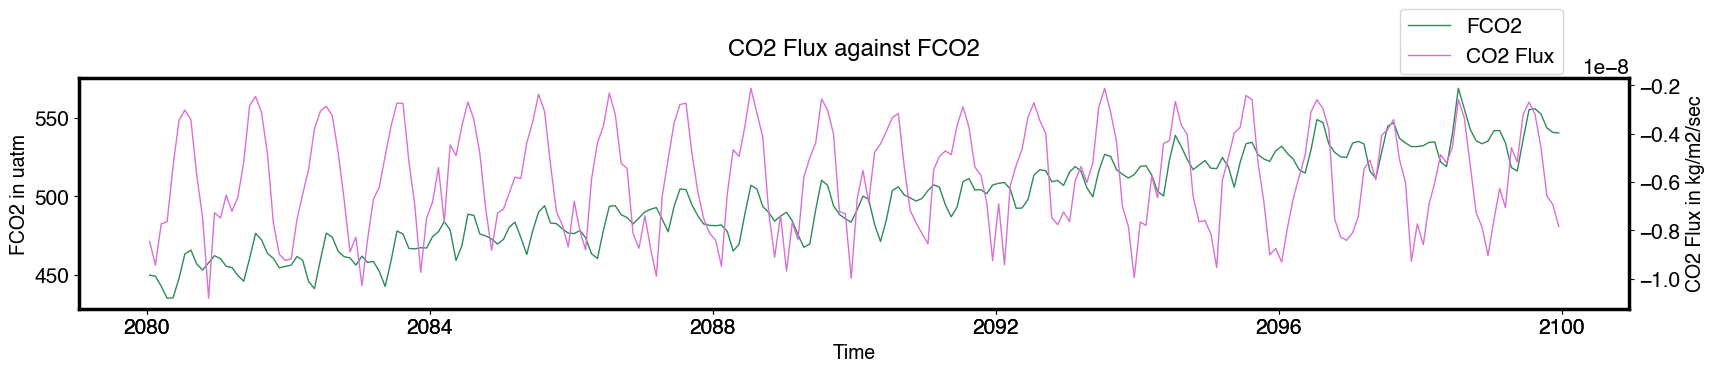

In [39]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(fco2_frame_oae.index, fco2_frame_oae.fco2, linewidth=1, color="seagreen", label = 'FCO2')
ax.set_ylabel('FCO2 in uatm', fontsize=14)

ax2.plot(co2flux_frame_oae.index, co2flux_frame_oae.co2flux_cpl, linewidth=1, color="orchid", label = 'CO2 Flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 Flux against FCO2', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()

### CO2 Flux against Alkalinity - OAE

In [ ]:
alk_oae = xr.open_dataset('/Volumes/UnionSine 1/Data_Transfer/2.6/ALK_CDR_EU_coast_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [ ]:
sliced_alk_oae = alk_oae.where((-25 < alk_oae.nav_lon) & (alk_oae.nav_lon < 10) & (40 < alk_oae.nav_lat) & (alk_oae.nav_lat < 70), drop=True)

In [ ]:
start_date = "2080-01-01"
end_date = "2100-01-01"

alk_frame_oae = sliced_alk_oae.sel(time_counter=slice(start_date, end_date))
alk_frame_oae = alk_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [ ]:
alk_frame_oae = alk_frame_oae.to_dataframe('ALK')

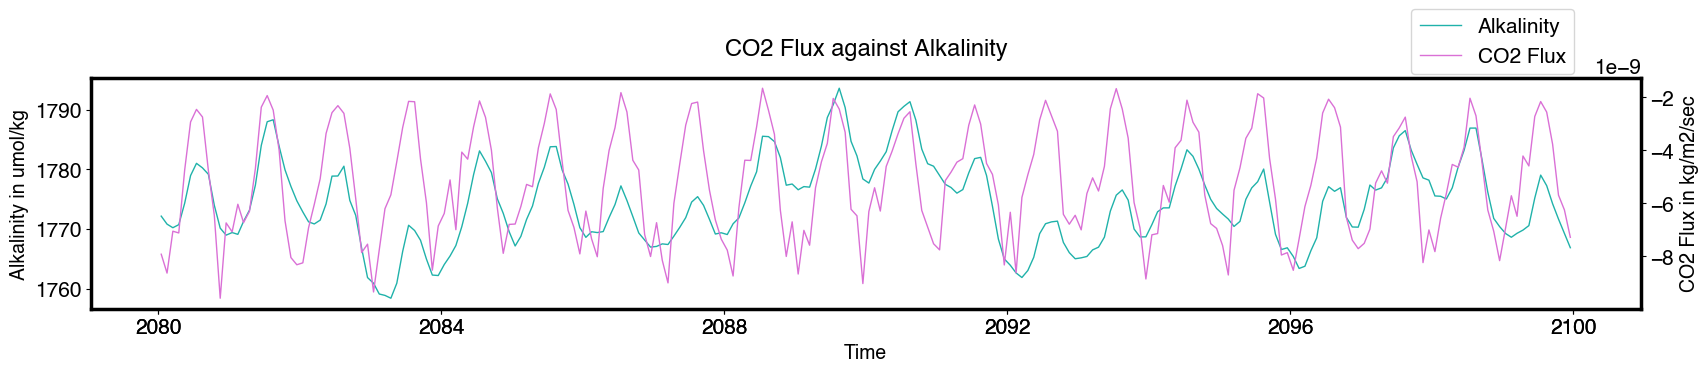

In [99]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_oae.index, alk_frame_oae.ALK, linewidth=1, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)

ax2.plot(co2flux_frame_oae.index, co2flux_frame_oae.co2flux_cpl, linewidth=1, color="orchid", label = 'CO2 Flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 Flux against Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()